In [1]:
import pandas as pd


#Put your path to file here
file_path = r"E:\Test_data\Test_data.csv"

#Make sure of the format of your document. Here I converted your document to csv type, that's why I've used read_csv
df = pd.read_csv(file_path)

In [9]:
# Printing the dataframe
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          13 non-null     int64         
 1   Region            13 non-null     object        
 2   Product Category  13 non-null     object        
 3   Sales Amount      13 non-null     int64         
 4   Cost              13 non-null     int64         
 5   Profit            13 non-null     int64         
 6   Order Date        13 non-null     datetime64[ns]
 7   Customer Segment  13 non-null     object        
 8   Profit Margin     13 non-null     float64       
 9   YearMonth         13 non-null     period[M]     
dtypes: datetime64[ns](1), float64(1), int64(4), object(3), period[M](1)
memory usage: 1.1+ KB
None
   Order ID Region Product Category  Sales Amount  Cost  Profit Order Date  \
0      1001  North      Electronics          1500  1000     500 2023-06

In [10]:
# Checking for completeness 
print(df.isnull().sum())

# Converting Order Date to a date format
df["Order Date"] = pd.to_datetime(df["Order Date"], format="%m/%d/%Y")

# Defining profit margin
df["Profit Margin"] = df["Profit"] / df["Sales Amount"]

Order ID            0
Region              0
Product Category    0
Sales Amount        0
Cost                0
Profit              0
Order Date          0
Customer Segment    0
Profit Margin       0
YearMonth           0
dtype: int64


In [4]:
# Grouping by region
sales_by_region = df.groupby("Region").agg(
    Total_Sales=("Sales Amount", "sum"),
    Total_Profit=("Profit", "sum"),
    Avg_Sales=("Sales Amount", "mean")
).reset_index()

print(sales_by_region)


  Region  Total_Sales  Total_Profit    Avg_Sales
0   East         3200           900  1066.666667
1  North         4800          1350  1200.000000
2  South         3700           800  1233.333333
3   West         4100           950  1366.666667


In [5]:
# Data Summarization
category_sales = df.groupby("Product Category").agg(
    Total_Sales=("Sales Amount", "sum"),
    Total_Profit=("Profit", "sum"),
    Avg_Profit_Margin=("Profit Margin", "mean")
).reset_index()

print(category_sales)


  Product Category  Total_Sales  Total_Profit  Avg_Profit_Margin
0      Electronics         8900          2200           0.251725
1        Furniture         3600          1000           0.289423
2  Office Supplies         3300           800           0.246302


In [6]:
# Trend analysis
customer_segment_analysis = df.groupby("Customer Segment").agg(
    Total_Sales=("Sales Amount", "sum"),
    Total_Profit=("Profit", "sum")
).reset_index()

print(customer_segment_analysis)


  Customer Segment  Total_Sales  Total_Profit
0         Consumer         4600          1150
1        Corporate         7500          2050
2   Small Business         3700           800


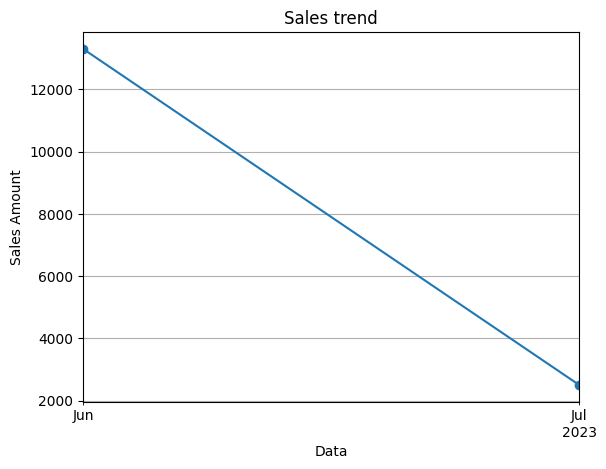

In [7]:
import matplotlib.pyplot as plt
# Grouping by order date
df["YearMonth"] = df["Order Date"].dt.to_period("M")
sales_trend = df.groupby("YearMonth")["Sales Amount"].sum()

# Ploting
sales_trend.plot(kind="line", marker="o", title="Sales trend")
plt.xlabel("Data")
plt.ylabel("Sales Amount")
plt.xticks(rotation=45)
plt.grid()
plt.show()


In [8]:
# Sorting by top and worst regions
top_region = sales_by_region.sort_values(by="Total_Profit", ascending=False).head(1)
worst_region = sales_by_region.sort_values(by="Total_Profit", ascending=True).head(1)

print(f"Top region:\n{top_region}")
print(f"Worst region:\n{worst_region}")


Top region:
  Region  Total_Sales  Total_Profit  Avg_Sales
1  North         4800          1350     1200.0
Worst region:
  Region  Total_Sales  Total_Profit    Avg_Sales
2  South         3700           800  1233.333333
